## STRUCTURAL/GEOTECHNICAL 
### Project #5: Automation of Steel Beam Calculations (Steel Design)



The goal of this project is to generate a proof of concept Python program that can help automate the calculations for a W-shaped Tension member (Example D.1)

##### Import packages and Data set

In [71]:
## Import packages that are needed and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install steelpy
from steelpy import aisc
W12x26 = aisc.W_shapes.W12X26

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [78]:
# Using the package

print (f"The Yield Strength of a W12X26 member is {W12x26.area * 50} ksi")

#CSV file
W_data = pd.read_csv('CIVE202_Spring2025_GroupU_Project5_Wshapes.csv')
W_data = pd.DataFrame(W_data)

The Yield Strength of a W12X26 member is 382.5 ksi


### Formulas

List the formulas that are required for the calculations of W-shaped Tension member

List all the formulas:

1. net area = gross area - bolt hole number * bolt diameter * flange thickness
2. yield on gross area = steel yield strength* gross area
3. Rupture = ultimate tensile strength * (net area * reduction factors)
4. Block Shear Rupture = o.6 * yield strength * gross (shear) area + ultimate tensile strength * net (shear) area
5. Slenderness ratio = length / radius of gyration

In [75]:
## Example of calculation (in mm)
gross_area = 115500
bolt_number = 200
bolt_diameter = 4
flange_thickness = 13.6

net_area = gross_area - bolt_number * bolt_diameter * flange_thickness
print(net_area)

104620.0


### Functions 

Create functions that automate the W-shaped tension member calculations

In [55]:
## Define the functions
def Net_area (gross_area, bolt_number, bolt_diameter, flange_thickness):
    net_area = gross_area - bolt_number * bolt_diameter * flange_thickness
    return net_area

def Gross_yield (yield_strength, gross_area):
    gross_yield = yield_strength * gross_area
    return gross_yield

def Net_rupture (ultimate_tensile_strength, net_area, reduction_factors):
    rupture = ultimate_tensile_strength * (net_area * reduction_factors)
    return rupture

def Shear_stress (yield_strength, length, width, ultimate_tensile_strength, bolt_number, bolt_diameter, flange_thickness):
    shear_stress = 0.6 * yield_strength * (length * width) + ultimate_tensile_strength * ((length * width) - (bolt_number * bolt_diameter * flange_thickness))
    return shear_stress

def Slenderness_ratio (length, radius_of_gyration):
    slenderness = length / radius_of_gyration
    return slenderness

In [58]:
## Testing of functions
print('All measurements must be defined in same units for proper calculations')
print(f"The net area is {Net_area (45000, 200, 4, 13.6):.2f}")
print(f"The yield strength is {Gross_yield (32000, 60000):.2f}")
print(f"The net section rupture is {Net_rupture (54000, 45000, 0.7):.2f}")
print(f"The block shear stress is {Shear_stress (32000, 5000, 20, 45000, 2, 0.75, 13.6):.2f}")
print(f"The slenderness ratio is {Slenderness_ratio (32, 3.45):.2f}")

All measurements must be defined in same units for proper calculations
The net area is 34120.00
The yield strength is 1920000000.00
The net section rupture is 1701000000.00
The block shear stress is 6419082000.00
The slenderness ratio is 9.28


Run the functions in different scenarios. After that plot the graph to show the differences between the results. Use the interactive graphs provided in the Project #5 files if needed.


##### Scenario 1:

In [37]:
## Function that applies to scenario 1 
W_data['net_area'] = Net_area(W_data['area'], 20, 0.75, W_data['tf'])

##### Graph for scenario 1:

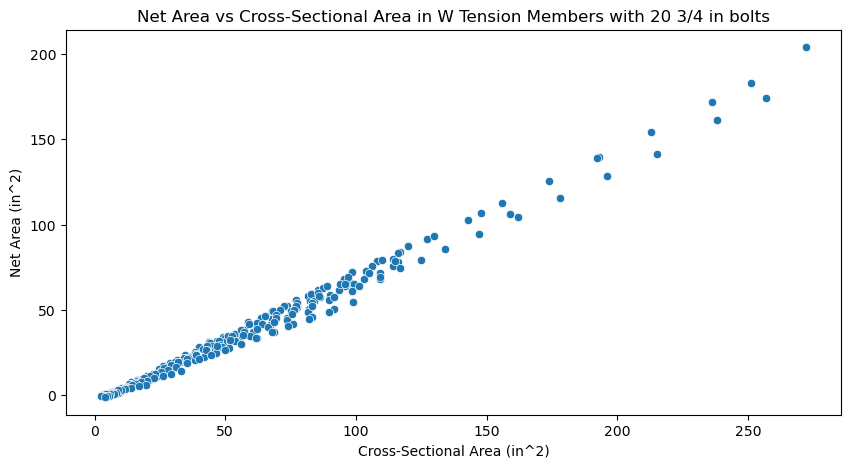

In [42]:
## Plot the graph
plt.figure(figsize=(10,5))

sns.scatterplot(x = W_data['area'], y = W_data['net_area'])

# Step 3: add customizations
plt.xlabel('Cross-Sectional Area (in^2)')
plt.ylabel('Net Area (in^2)')
plt.title('Net Area vs Cross-Sectional Area in W Tension Members with 20 3/4 in bolts')
plt.show()

##### Scenario 2: 

In [46]:
## Function that applies to scenario 2

# 0.75 is standard reduction factor for strength, 65 ksi is standard W member ultimate tensile strength
W_data['Net_Rupture'] = Net_rupture (65, W_data['net_area'], 0.75)

#50 ksi is the standard yield strength in W shaped members
W_data['yield_strength'] = Gross_yield (50, W_data['area'])

##### Plot the graph for scenario 2 : 

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


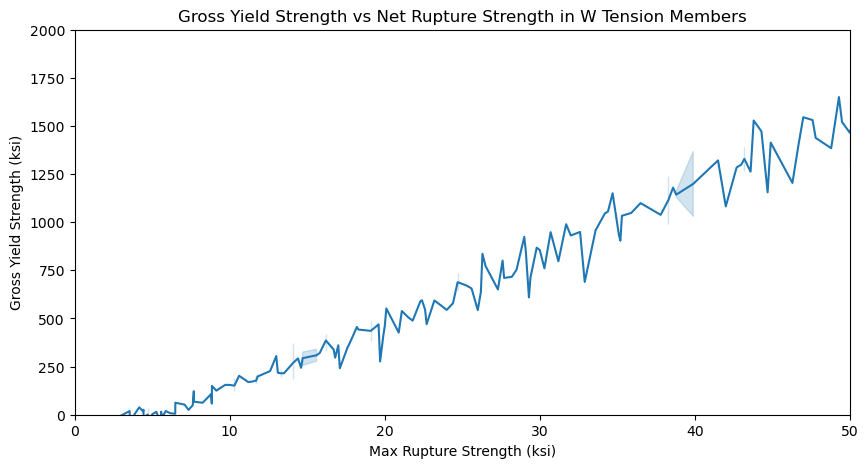

In [61]:
## Plot the graph
plt.figure(figsize=(10,5))

sns.lineplot(x = W_data['area'], y = W_data['Net_Rupture'])

# Step 3: add customizations
plt.xlabel('Max Rupture Strength (ksi)')
plt.ylabel('Gross Yield Strength (ksi)')
plt.title('Gross Yield Strength vs Net Rupture Strength in W Tension Members')
plt.xlim(0,50)
plt.ylim(0, 2000)
plt.show()

##### Scenario 3:


In [67]:
## Function that applies to scenario 3

#same bolt number and thickness from scenario one for consistency, 5 in (length) between bolt holes
W_data['Block_shear_stress'] = Shear_stress (50, 5, W_data['bf'], 65, 20, 0.75, W_data['tf'])

##### Plot the graph for scenario 3: 

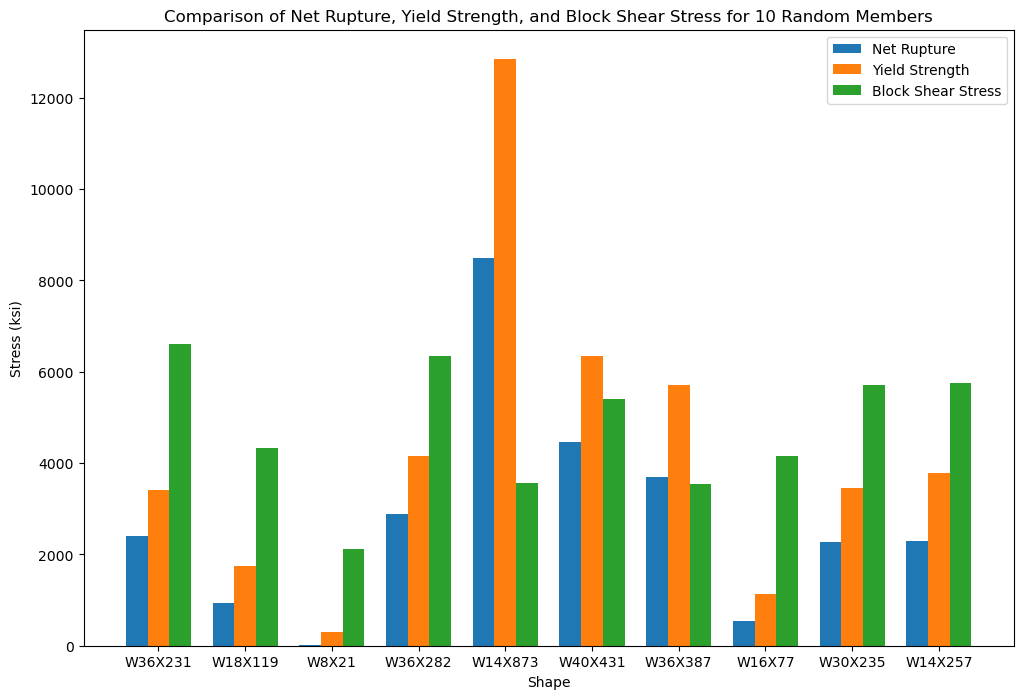

In [68]:
## Plot the graph
random_df = W_data.sample(n=10, random_state=42)

rupture = random_df['Net_Rupture'].values
max_yield = random_df['yield_strength'].values
shear = random_df['Block_shear_stress'].values

num_members = len(random_df)

bar_width = 0.25
index = np.arange(num_members)

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index - bar_width, rupture, bar_width, label='Net Rupture')
bar2 = ax.bar(index, max_yield, bar_width, label='Yield Strength')
bar3 = ax.bar(index + bar_width, shear, bar_width, label='Block Shear Stress')

ax.set_xlabel('Shape')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Comparison of Net Rupture, Yield Strength, and Block Shear Stress for 10 Random Members')
ax.set_xticks(index)
ax.set_xticklabels(random_df['shape'].values)
ax.legend()